# Modelo de regresión logística

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

# Revisión: Predicción de una respuesta continua

In [1]:
# conjunto de datos de identificación del vidrio
import pandas as pd
import numpy as np
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


**Pregunta:** Supongamos que queremos predecir **ri**, y nuestra única característica es **al**. ¿Cómo podríamos hacerlo utilizando el aprendizaje automático?

**Respuesta:** Podríamos enmarcarlo como un problema de regresión, y utilizar un modelo de regresión lineal con **al** como única característica y **ri** como respuesta.

**Pregunta:** ¿Cómo podríamos **visualizar** este modelo?

**Respuesta:** Crear un gráfico de dispersión con **al** en el eje x y **ri** en el eje y, y dibujar la línea de mejor ajuste.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

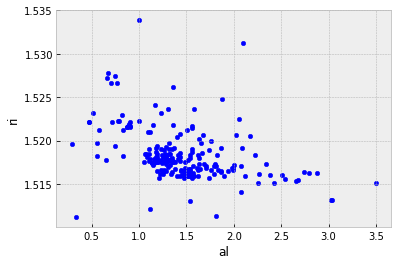

In [7]:
# Pandas
glass.plot(kind='scatter', x='al', y='ri')

Text(0, 0.5, 'ri')

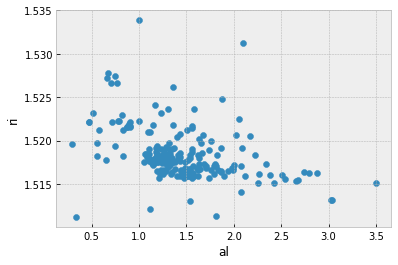

In [8]:
# Matplotlib
plt.scatter(glass.al, glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [9]:
# ajustar un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# hacer predicciones para todos los valores de X
glass['ri_pred'] = linreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682


Text(0, 0.5, 'ri')

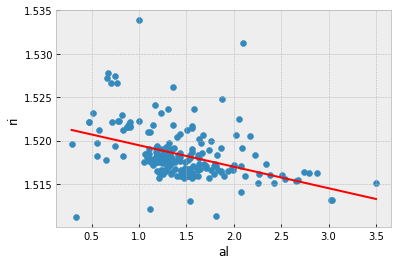

In [63]:
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

### Repaso: interpretación de los coeficientes de regresión lineal

$y = \beta_0 + \beta_1x$

In [12]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

In [13]:
# compute prediction for al=2 using the predict method
test = np.array(2)
test = test.reshape(-1,1)
linreg.predict(test)

array([1.51699012])

In [14]:
# examine coefficient for al
print(feature_cols, linreg.coef_)

['al'] [-0.00247761]


**Interpretación:** Un aumento de 1 unidad en "al" se asocia con una disminución de 0,0025 unidades en "ri".

In [15]:
# aumentando al en 1 (para que al=3) disminuye ri en 0,0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [16]:
# calcula la predicción para al=3 usando el método de predicción
test = np.array(3)
test = test.reshape(-1,1)
linreg.predict(test)

array([1.51451251])

# Predicción de una respuesta categórica

In [17]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

***Nota:*** La función `.map()` se utiliza para mapear valores de Series según la correspondencia de entrada.

Se utiliza para sustituir cada valor de una Serie por otro valor, que puede derivarse de una función, un dict o una Serie.

In [18]:
# Los tipos 1, 2 y 3 son vidrios para ventanas
# Los tipos 5, 6 y 7 son de vidrio doméstico

glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0


Cambiemos nuestra tarea, de modo que predigamos **hogar** utilizando **al**. Visualicemos la relación para saber cómo hacerlo:

Text(0, 0.5, 'household')

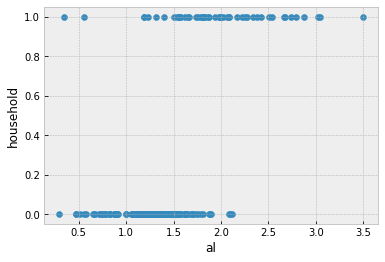

In [19]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Dibujemos una **línea de regresión**, como hicimos antes:

In [20]:
# ajustar un modelo de regresión lineal y almacenar las predicciones
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)
glass.head

<bound method NDFrame.head of           ri     na    mg  ...   ri_pred  household  household_pred
id                         ...                                     
22   1.51966  14.77  3.75  ...  1.521227          0       -0.340495
185  1.51115  17.38  0.00  ...  1.521103          1       -0.315436
40   1.52213  14.21  3.82  ...  1.520781          0       -0.250283
39   1.52213  14.21  3.82  ...  1.520781          0       -0.250283
51   1.52320  13.72  3.72  ...  1.520682          0       -0.230236
..       ...    ...   ...  ...       ...        ...             ...
193  1.51623  14.20  0.00  ...  1.515033          1        0.912448
210  1.51623  14.14  0.00  ...  1.514810          1        0.957554
173  1.51321  13.00  0.00  ...  1.514463          1        1.027718
172  1.51316  13.02  0.00  ...  1.514413          1        1.037742
164  1.51514  14.01  2.68  ...  1.513274          1        1.268283

[214 rows x 13 columns]>

Text(0, 0.5, 'household')

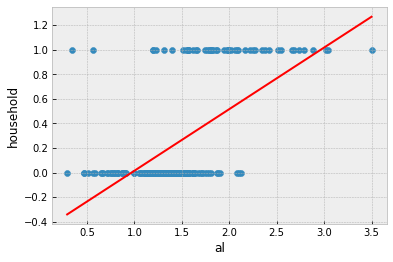

In [21]:
# gráfico de dispersión que incluye la línea de regresión
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

Si **al=3**, ¿qué clase predecimos para el hogar? **1**

Si **al=1,5**, ¿qué clase predecimos para el hogar? **0**

Predecimos la clase 0 para los valores **más bajos** de al, y la clase 1 para los valores **más altos** de al. ¿Cuál es nuestro valor de corte? Alrededor de **al=2**, porque es donde la línea de regresión lineal cruza el punto medio entre la predicción de la clase 0 y la clase 1.

Por lo tanto, diremos que si **hogar_pred >= 0,5**, predecimos una clase de **1**, si no, predecimos una clase de **0**.

## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $h_\beta(x)$ es la variable respuesta
- $\beta_0$ es el valor de intercepto
- $\beta_1$ es el coeficiente para la variable $x_1$ (la primera característica)
- $\beta_n$ es el coeficiente para la variable $x_n$ (la n-íesima característica)

*si $h_\beta(x)\le 0.5$ cuando $\hat y = 0$*

*si $h_\beta(x)> 0.5$ cuando $\hat y = 1$*

In [22]:
# entendiendo np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where devuelve el primer valor si la condición es True, y el segundo valor si la condición es False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [23]:
# transformar household_pred en 1 o 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0


Text(0, 0.5, 'household')

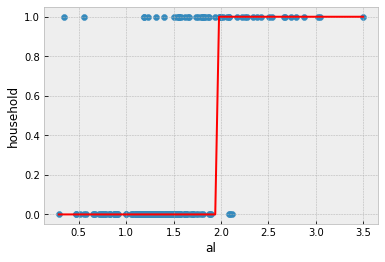

In [24]:
# trazar las predicciones de la clase
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

$h_\beta(x)$ puede ser inferior a 0 o superior a 1, lo cual es contra intuitivo

## Usando la regresión logística en su lugar

La regresión logística puede hacer lo que acabamos de hacer:

In [62]:
# ajustar un modelo de regresión logística y almacenar las predicciones de clase
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.001499
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.001847
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.003176
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.003176
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.003752


Text(0, 0.5, 'household')

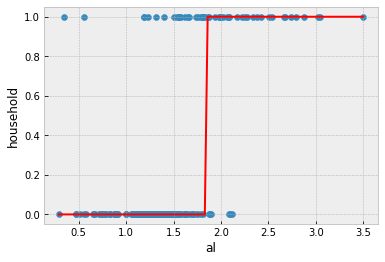

In [41]:
# trazar las predicciones de la clase
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

¿Y si quisiéramos las **probabilidades predichas** en lugar de sólo las **predicciones de clase**, para entender el grado de confianza que tenemos en una determinada predicción?

In [42]:
# almacenar las probabilidades previstas de la clase 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.001499
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.001847
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.003176
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.003176
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.003752


Text(0, 0.5, 'household')

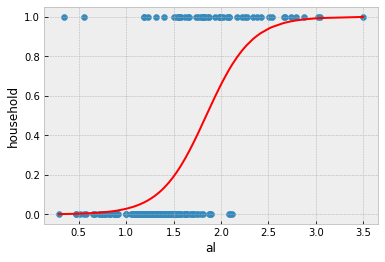

In [43]:
# trazar las probabilidades predichas
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [44]:
# examinar algunas predicciones de ejemplo
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.97161726 0.02838274]]
[[0.34361555 0.65638445]]
[[0.00794192 0.99205808]]


La primera columna indica la probabilidad prevista de la **clase 0**, y la segunda columna indica la probabilidad prevista de la **clase 1**.

## Probabilidad, [odds(¿Posibilidad?)](http://networkianos.com/odd-ratio-que-es-como-se-interpreta/), e, log, log-odds

$$probabilidad = \frac {un\ resultado} {todos\ los\ resultados}$$

$$odds = \frac {un\ resultado} {todos\ los\ demás\ resultados}$$

Ejemplos:

- Tirada de dados de 1: probabilidad = 1/6, odds = 1/5
- Tirada de dados par: probabilidad = 3/6, odds = 3/3 = 1
- Tirada de dados inferior a 5: probabilidad = 4/6, odds = 4/2 = 2

$$odds = \frac {probabilidad} {1 - probabilidad}$$

$$probabilidad = \frac {odds} {1 + odds}$$

Los odds se interpretan como ratios, es decir, la cantidad de veces que algo pueda suceder sobre que no pueda suceder.

In [45]:
# crear una tabla de probabilidad frente a las probabilidades
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


¿Qué es **e**? Es la tasa base de crecimiento que comparten todos los procesos de crecimiento continuo:

In [46]:
# function exponencial: e^1
np.exp(1)

2.718281828459045

Qué es **(natural) log**? Te da el tiempo necesario para alcanzar un crecimiento del nivel de certeza.

In [47]:
# tiempo necesario para que 1 unidad crezca hasta 2,718 unidades
np.log(2.718)

0.999896315728952

También es el **inverso** de la función exponencial:

In [48]:
np.log(np.exp(5))

5.0

In [50]:
# añadir log-odds a la tabla
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## ¿Qué es la regresión logística?

**Regresión lineal**: la respuesta continua se modela como una combinación lineal de las características:

$$y = \beta_0 + \beta_1x$$

**Regresión logística**: las probabilidades logarítmicas de que una respuesta categórica sea "verdadera" (1) se modelan como una combinación lineal de las características:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

Esto se llama la **función logit**.

La probabilidad se escribe a veces como pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

La ecuación puede reordenarse en la **función logística**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

En otras palabras:

- La regresión logística produce las **probabilidades de una clase específica**
- Esas probabilidades pueden convertirse en **predicciones de clase**.

La **función logística** tiene algunas buenas propiedades:

- Tiene forma de "s"
- La salida está limitada por 0 y 1

Hemos visto cómo funciona esto para los problemas de clasificación binaria (dos clases de respuesta). ¿Pero qué pasa con los **problemas de clasificación multiclase** (más de dos clases de respuesta)?

- La solución más común para los modelos de clasificación es **"uno contra todos "** (también conocida como **"uno contra el resto"**): descomponer el problema en múltiples problemas de clasificación binaria
- **La regresión logística multinomial** puede resolverlo como un único problema



## Parte 6: Interpretación de los coeficientes de regresión logística

Text(0, 0.5, 'household')

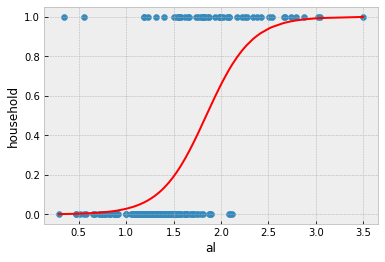

In [51]:
# vuelve a trazar las probabilidades predichas
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [52]:
# calcula las probabilidades logarítmicas predichas para al=2 utilizando la ecuación
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([0.64722323])

In [53]:
# convierte las odds logarítmicas en odds
odds = np.exp(logodds)
odds

array([1.91022919])

In [54]:
# Convertir los odds en probabilidad
prob = odds/(1 + odds)
prob

array([0.65638445])

In [55]:
# calcular la probabilidad predicha para al=2 utilizando el método predict_proba
logreg.predict_proba([[2]])[:, 1]

array([0.65638445])

In [56]:
# examinar el coeficiente de al
feature_cols, logreg.coef_[0]

(['al'], array([4.18040386]))

**Interpretación:** Un aumento de 1 unidad en "al" se asocia con un aumento de 4,18 unidades en las probabilidades logarítmicas de "hogar".

In [57]:
# aumentando al en 1 (de modo que al=3) aumenta las probabilidades logarítmicas en 4,18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9920580839167457

In [58]:
# calcular la probabilidad predicha para al=3 utilizando el método predict_proba
logreg.predict_proba([[3]])[:, 1]

array([0.99205808])

**Línea inferior:** Los coeficientes positivos aumentan las probabilidades logarítmicas de la respuesta (y, por tanto, aumentan la probabilidad), y los coeficientes negativos disminuyen las probabilidades logarítmicas de la respuesta (y, por tanto, disminuyen la probabilidad).

In [59]:
# examinar el intercepto
logreg.intercept_

array([-7.71358449])

**Interpretación:** Para un valor de "al" de 0, el logaritmo de las posibilidades de "hogar" es de -7,71.

In [60]:
# convierte las probabilidades logarítmicas en probabilidad
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.00044652])

In [61]:
logreg.predict_proba([[0]])[:, 1]

array([0.00044652])

Esto tiene sentido a partir del gráfico anterior, porque la probabilidad de hogar=1 debería ser muy baja para un valor "al" tan bajo.

![Logistic regression beta values](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/logistic_betas.png)

Cambiar el valor de $\beta_0$ desplaza la curva **horizontalmente**, mientras que cambiar el valor de $\beta_1$ cambia la **pendiente** de la curva.

## Comparación de la regresión logística con otros modelos

Ventajas de la regresión logística

- Muy interpretable (si se recuerda cómo)
- El entrenamiento y la predicción del modelo son rápidos
- No se requiere ningún ajuste (excluyendo la regularización)
- Las características no necesitan ser escaladas
- Puede funcionar bien con un número reducido de observaciones
- Los resultados son probabilidades de predicción bien calibradas

Desventajas de la regresión logística:

- Presume una relación lineal entre las características y las probabilidades logarítmicas de la respuesta
- El rendimiento no es (generalmente) competitivo con los mejores métodos de aprendizaje supervisado
- No puede aprender automáticamente las interacciones de las características